# Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

Output: Number of predicted wins (W)

# Objective: To build a model to predict the number of wins(W)

In [168]:
#Importing the necessary Libraries

# linear algebra
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#data processing
import pandas as pd

#data visualization
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns

# Algorithms

from sklearn.preprocessing import power_transform,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

#saving the Model

import joblib

# Loading the dataset:

In [2]:
df=pd.read_csv('baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
#checking the dimension of the dataset

df.shape

(30, 17)

Remarks: The dataset consists of 30 rows and 17 columns

# Data Exploration/Analysis

In [4]:
#checking the column names

df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [5]:
#renaming the columns in order to have a better understanding during EDA

#renaming the columns in order to have a better understanding during EDA
df.rename({'R':'runs','AB':'at_bats','H':'Hits','2B':'Doubles','3B':'Triples','HR':'Homeruns','BB':'Walk','SO':'strikeout',
             'SB':'stolen_base','RA':'runs_allowed','ER':'earned_runs','ERA':'earned_run_avg','CG':'Complete Games','SHO':'shutouts','SV':'saves',
             'E':'error','W':'No_of_predicted_wins'},axis=1,inplace=True)

In [6]:
#checking the first five rows

df.head()

,No_of_predicted_wins,runs,at_bats,Hits,Doubles,Triples,Homeruns,Walk,strikeout,stolen_base,runs_allowed,earned_runs,earned_run_avg,Complete Games,shutouts,saves,error
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [7]:
#checking last five rows

df.tail()

,No_of_predicted_wins,runs,at_bats,Hits,Doubles,Triples,Homeruns,Walk,strikeout,stolen_base,runs_allowed,earned_runs,earned_run_avg,Complete Games,shutouts,saves,error
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [8]:
#checking sample

df.sample(3)

,No_of_predicted_wins,runs,at_bats,Hits,Doubles,Triples,Homeruns,Walk,strikeout,stolen_base,runs_allowed,earned_runs,earned_run_avg,Complete Games,shutouts,saves,error
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
11,86,729,5459,1363,278,26,230,486,1392,121,618,572,3.57,5,13,39,85
20,90,683,5527,1351,295,17,177,488,1290,51,613,557,3.43,1,14,50,88


In [9]:
#checking the datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   No_of_predicted_wins  30 non-null     int64  
 1   runs                  30 non-null     int64  
 2   at_bats               30 non-null     int64  
 3   Hits                  30 non-null     int64  
 4   Doubles               30 non-null     int64  
 5   Triples               30 non-null     int64  
 6   Homeruns              30 non-null     int64  
 7   Walk                  30 non-null     int64  
 8   strikeout             30 non-null     int64  
 9   stolen_base           30 non-null     int64  
 10  runs_allowed          30 non-null     int64  
 11  earned_runs           30 non-null     int64  
 12  earned_run_avg        30 non-null     float64
 13  Complete Games        30 non-null     int64  
 14  shutouts              30 non-null     int64  
 15  saves                 30 

Remarks: All the columns are int datatype except for one column which is float datatype.

In [10]:
#checking the null vlaues

df.isnull().sum()

No_of_predicted_wins    0
runs                    0
at_bats                 0
Hits                    0
Doubles                 0
Triples                 0
Homeruns                0
Walk                    0
strikeout               0
stolen_base             0
runs_allowed            0
earned_runs             0
earned_run_avg          0
Complete Games          0
shutouts                0
saves                   0
error                   0
dtype: int64

<AxesSubplot:>

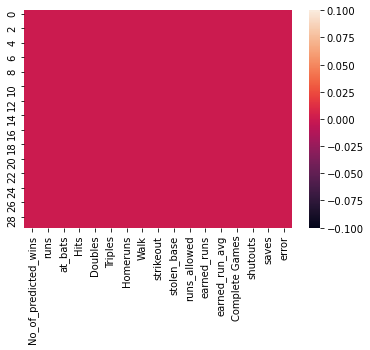

In [11]:
#checking null values by heatmap

sns.heatmap(df.isnull())

No null values Found in our dataset

In [12]:
#checking the unique values presents in the columns

df.nunique()

No_of_predicted_wins    24
runs                    28
at_bats                 29
Hits                    29
Doubles                 22
Triples                 23
Homeruns                27
Walk                    29
strikeout               29
stolen_base             27
runs_allowed            30
earned_runs             30
earned_run_avg          30
Complete Games           9
shutouts                12
saves                   20
error                   21
dtype: int64

Remarks:  
Looking at all the unique values present in each of the columns in our dataset, we see that there are no categorical data present since even the unique numbers are large in number and cannot be segregated or combined.

# Statistical Analysis

In [13]:
df.describe()

,No_of_predicted_wins,runs,at_bats,Hits,Doubles,Triples,Homeruns,Walk,strikeout,stolen_base,runs_allowed,earned_runs,earned_run_avg,Complete Games,shutouts,saves,error
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [14]:
#count for all columns are same so no data is missing

# Exploratory Data Analysis (EDA)
Univariate Analysis--

<AxesSubplot:xlabel='Homeruns', ylabel='Density'>

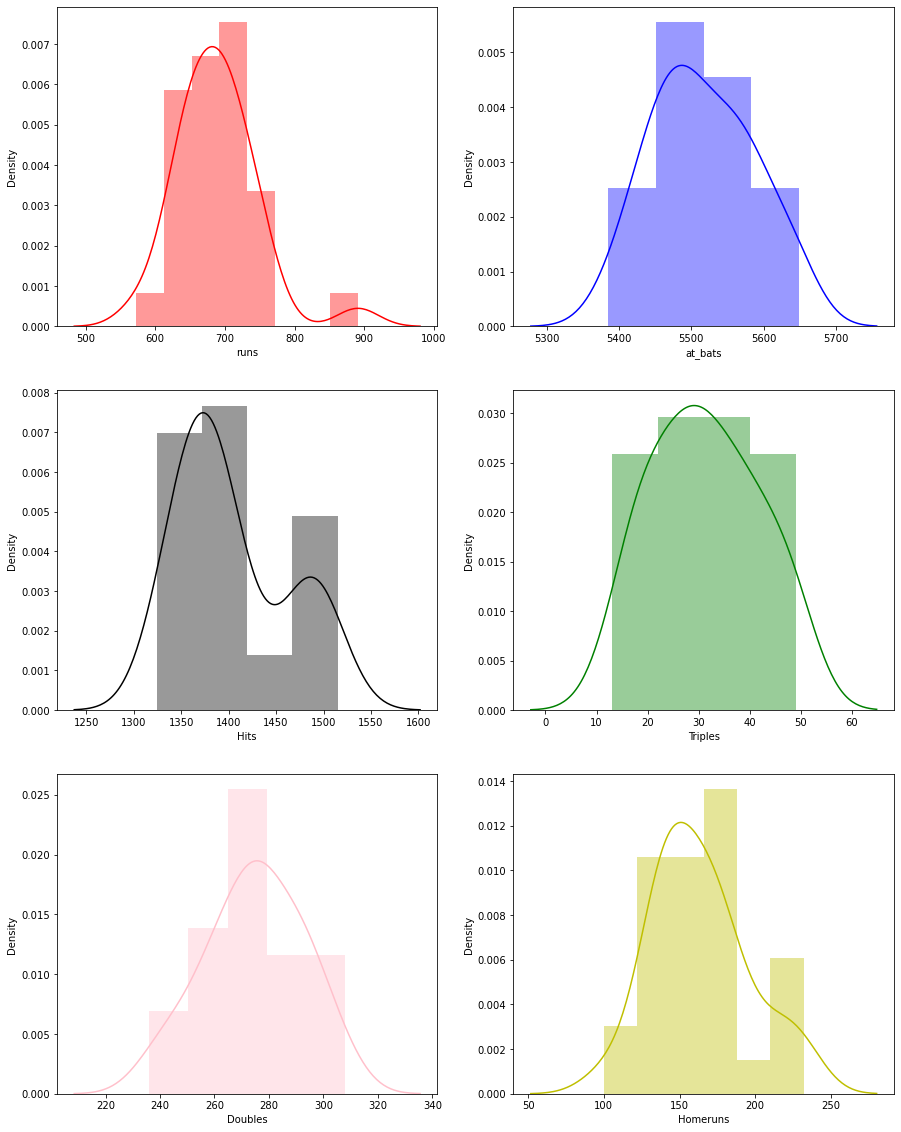

In [15]:
#checking the distribution plot for all columns

plt.figure(figsize=(15,20))
plt.subplot(3,2,1)
sns.distplot(df.runs,kde=True,color='red')
plt.subplot(3,2,2)
sns.distplot(df.at_bats,kde=True,color='b')
plt.subplot(3,2,3)
sns.distplot(df.Hits,kde=True,color='black')
plt.subplot(3,2,4)
sns.distplot(df.Triples,kde=True,color='green')
plt.subplot(3,2,5)
sns.distplot(df.Doubles,kde=True,color='pink')
plt.subplot(3,2,6)
sns.distplot(df.Homeruns,kde=True,color='y')

Observation: The above distribution plots shows that not a single column in our dataset is normally distributed

<AxesSubplot:xlabel='strikeout', ylabel='Density'>

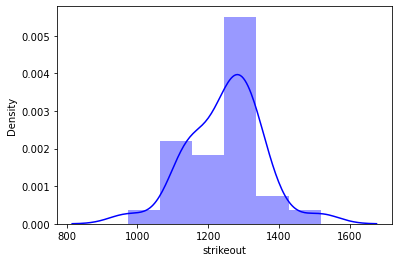

In [16]:
#checking the distplot 

sns.distplot(df.strikeout,color='b')

<AxesSubplot:xlabel='stolen_base', ylabel='Density'>

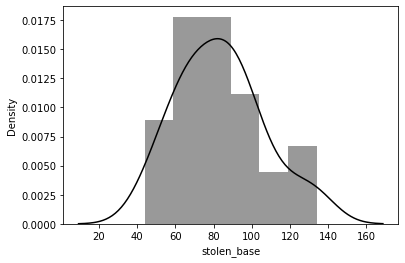

In [17]:
#checking the distplot 

sns.distplot(df.stolen_base,color='black')

<AxesSubplot:xlabel='shutouts', ylabel='Density'>

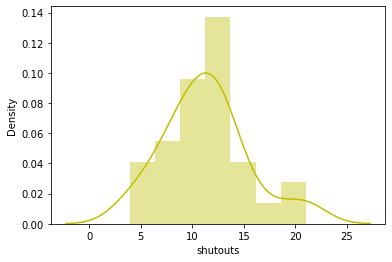

In [18]:
#checking the distplot 

sns.distplot(df.shutouts,color='y')

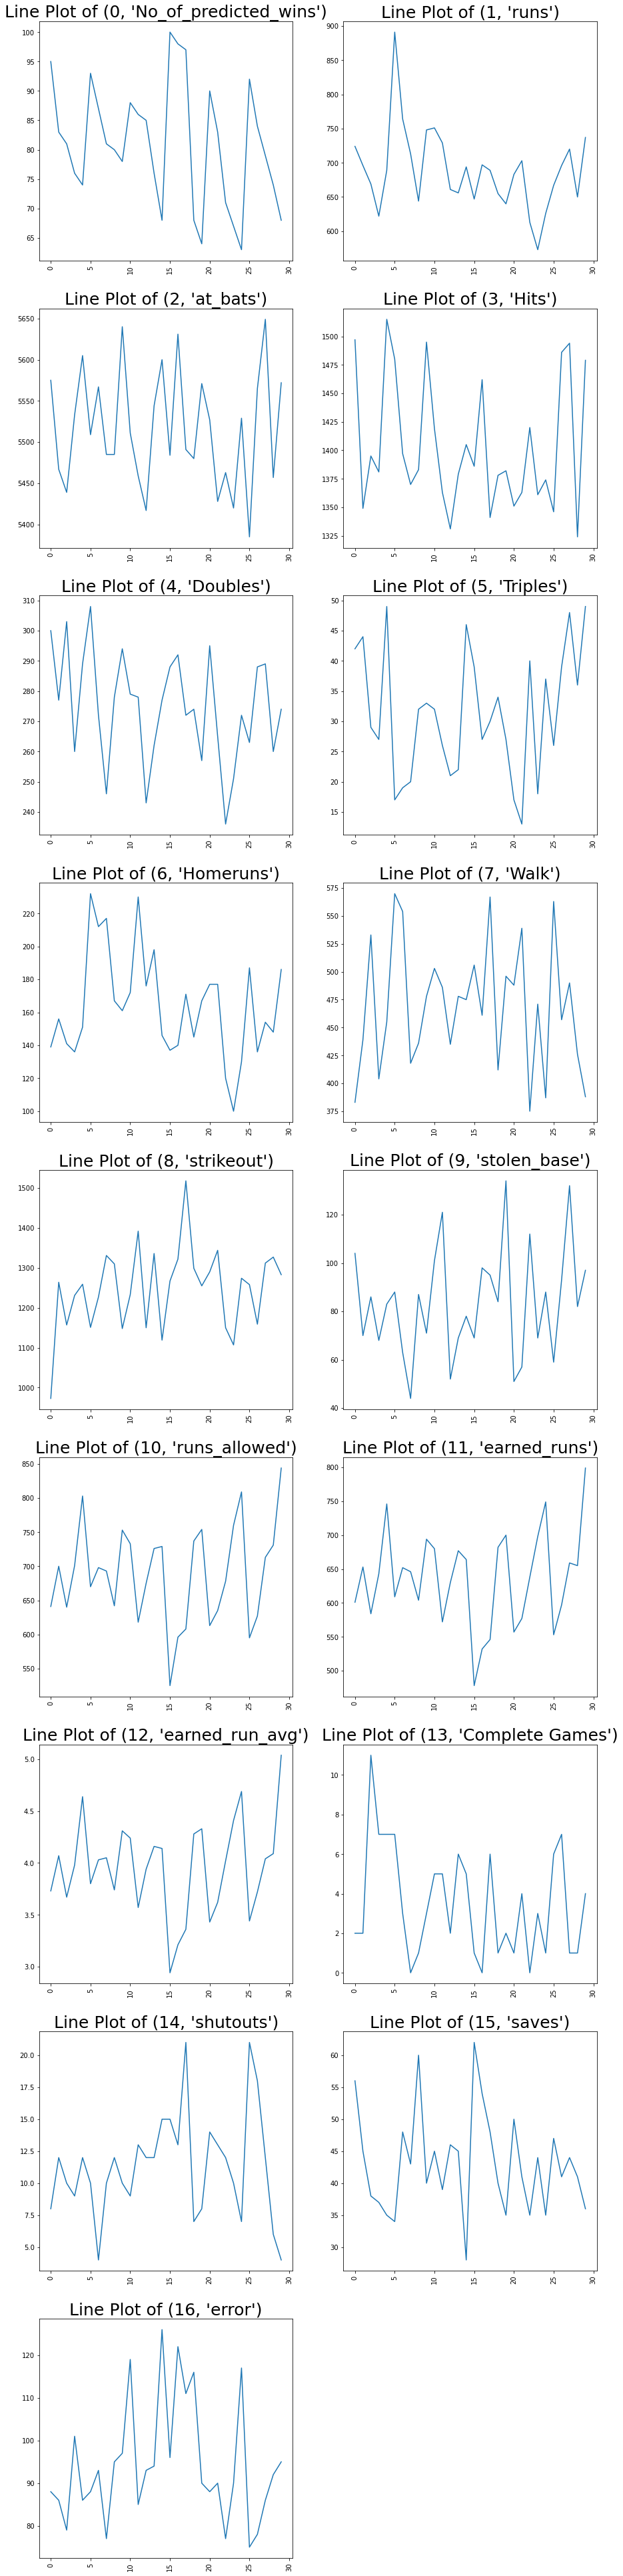

In [19]:
#checking lineplot for all the columns


col=['No_of_predicted_wins', 'runs', 'at_bats', 'Hits', 'Doubles', 'Triples',
       'Homeruns', 'Walk', 'strikeout', 'stolen_base', 'runs_allowed',
       'earned_runs', 'earned_run_avg', 'Complete Games', 'shoutout', 'saves',
       'error']


plt.figure(figsize=(15,70))
for i in enumerate(df):
    plt.subplot(9,2,i[0]+1)
    plt.plot(df[i[1]])
    plt.xticks(rotation=90)
    plt.title(f"Line Plot of {i}",fontsize=25)


Observation: From the lineplots plotted above, we can see that runs_allowed, earned_run_avg, and earned_runs are the only columns that are stationary while the rest columns are not stationary

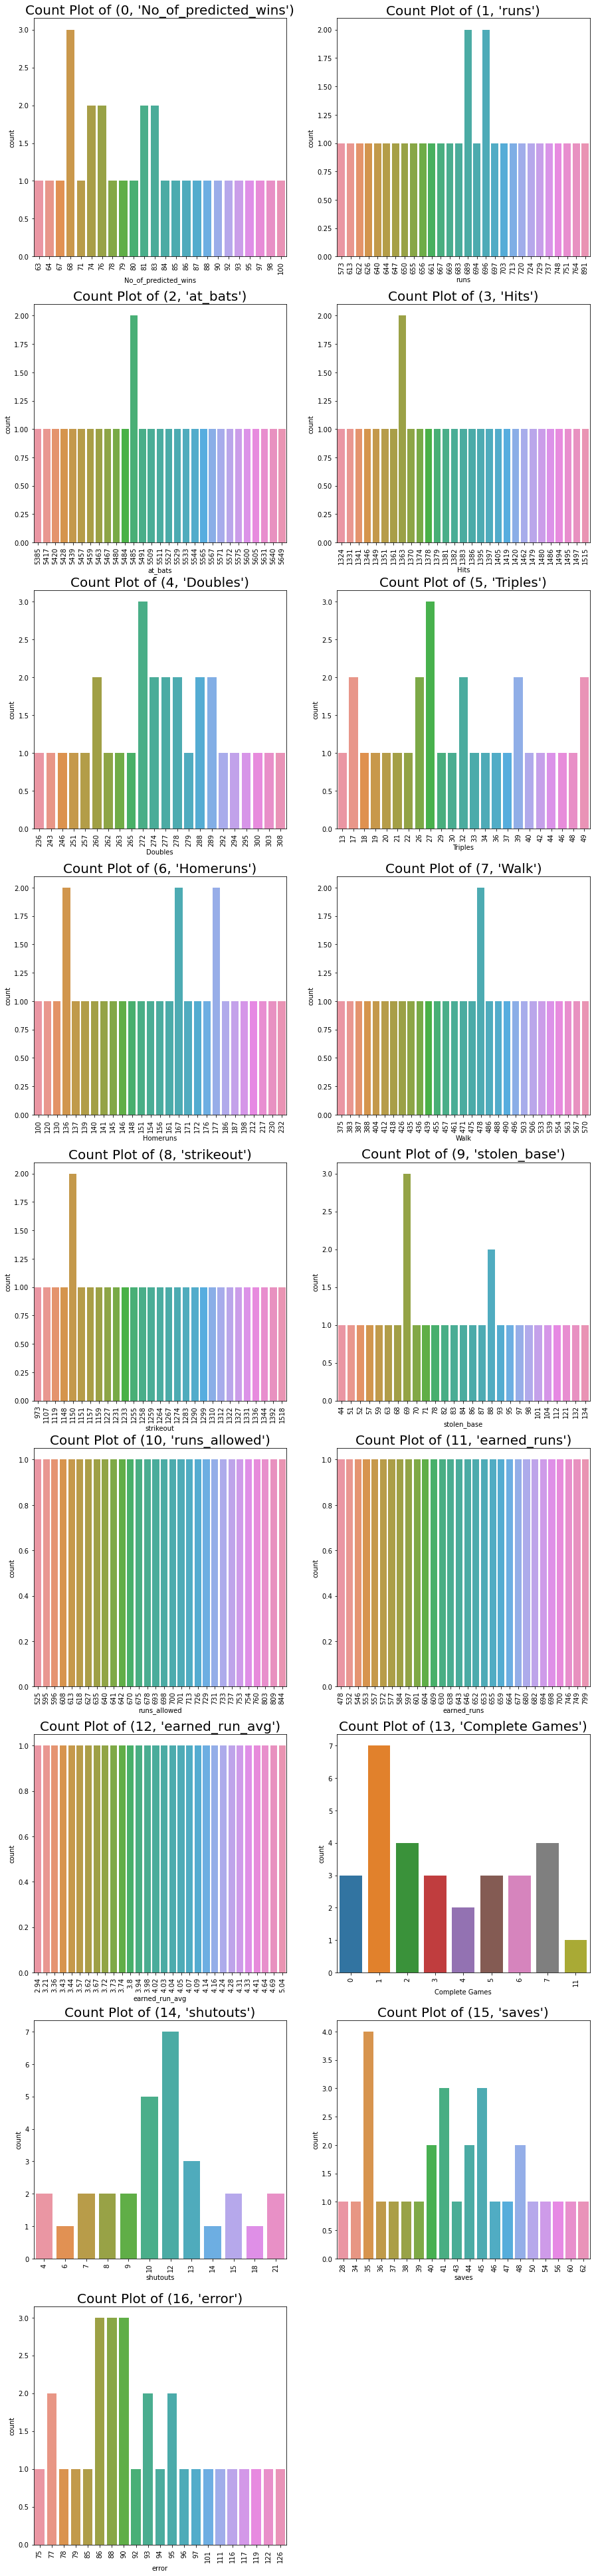

In [20]:
#checking the count plot for all the columns
plt.figure(figsize=(15,70))
for i in enumerate(df):
    
    plt.subplot(9,2,i[0]+1)
    sns.countplot(df[i[1]])
    plt.xticks(rotation=90)
    plt.title(f"Count Plot of {i}",fontsize=20)

Observations:

From error column, we can see that the highest count for error is 3 while rest of them have a count of 1.

From saves column, we can see that the highest count for saves is 4.

From shutouts, we can say that 12 has the highest count which is 7, folowed by 10 having count 5 and 13 having count 3.

From complete games column, we can say that 1,2,7 have the high count which is 7,4,4 and rest of them have same count of 3 while 11 has the least count of completion of match.

From all the remaining columns, we see that they have equal count, still we can see they includes outliers.

# Bivariate Analysis--

Text(0, 0.5, 'Errors')

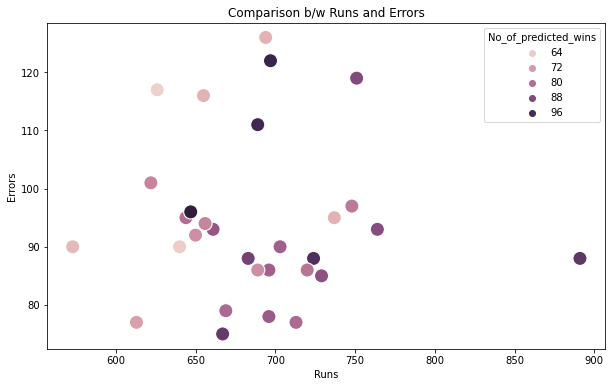

In [21]:
# Checking the relation between two variables

plt.figure(figsize=(10,6))
plt.title('Comparison b/w Runs and Errors')
sns.scatterplot(df['runs'],df['error'],hue=df['No_of_predicted_wins'],s=200)
plt.xlabel('Runs')
plt.ylabel('Errors')

The scatterplot gives the relation between the Runs and Errors with respect to Wins. There is no linear relationship between these columns. We can infer that there is no correlation. The runs between 650-730 with the error upto 95 has more wins. Also we can see the presence of outliers

In [22]:
df.columns

Index(['No_of_predicted_wins', 'runs', 'at_bats', 'Hits', 'Doubles', 'Triples',
       'Homeruns', 'Walk', 'strikeout', 'stolen_base', 'runs_allowed',
       'earned_runs', 'earned_run_avg', 'Complete Games', 'shutouts', 'saves',
       'error'],
      dtype='object')

<AxesSubplot:title={'center':'Comparision b/w Runs and Hits'}, xlabel='Runs', ylabel='Hits'>

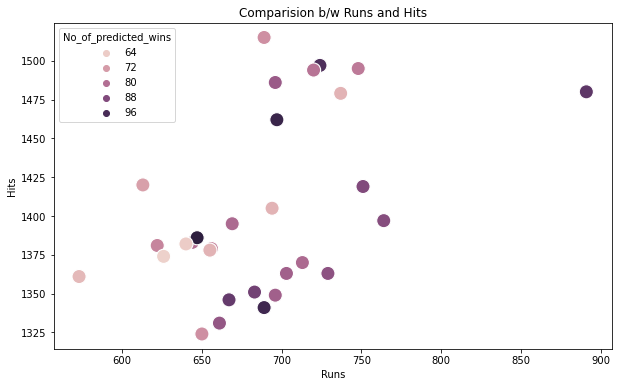

In [23]:
# Checking the relation between two variables

plt.figure(figsize=(10,6))
plt.title('Comparision b/w Runs and Hits')
plt.xlabel('Runs')
plt.ylabel('Hits')
sns.scatterplot(df['runs'],df['Hits'],hue=df['No_of_predicted_wins'],s=200)

As we can infer that the there is no linearity between the columns. Also the rate of runs is high in the range 650 to 750 with the rate of hits renges 1500, which means the wins of the team is more in these ranges

<AxesSubplot:title={'center':'comparison between Runs Allowed and Earned Run Avg'}, xlabel='runs_allowed', ylabel='earned_run_avg'>

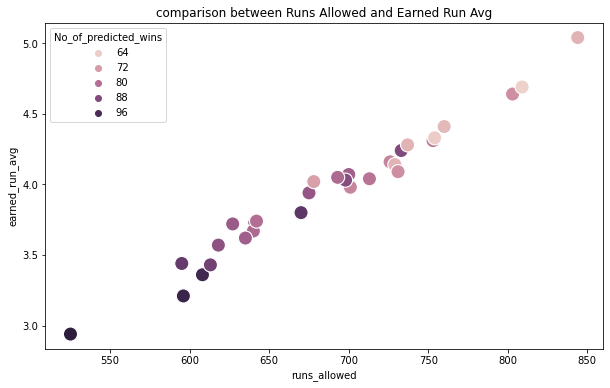

In [26]:
#checking relation b/w two variable

plt.figure(figsize=(10,6))
plt.title('comparison between Runs Allowed and Earned Run Avg')
sns.scatterplot(df['runs_allowed'],df['earned_run_avg'],hue=df['No_of_predicted_wins'],s=200)

From the above plot, it is seen that there is a strong relationship between these columns. As the Runs allowed increases, ERA also increases which leads to the increase in winning rate

Text(0, 0.5, 'Wins')

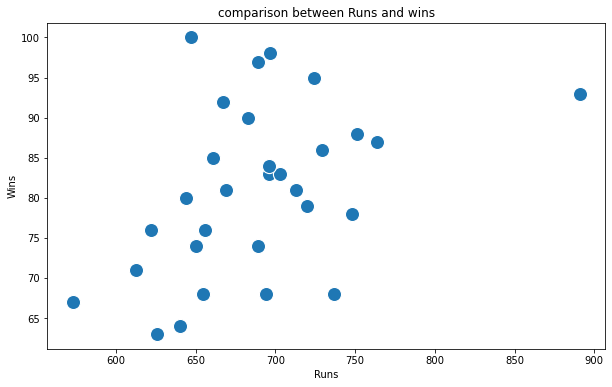

In [27]:
#checking relation b/w two variable

plt.figure(figsize=(10,6))
plt.title('comparison between Runs and wins')
sns.scatterplot(df['runs'],df['No_of_predicted_wins'],s=200)
plt.xlabel("Runs")
plt.ylabel("Wins")

Form this we can say, as run rate increases,rate of win also increases.

Text(0, 0.5, 'Wins')

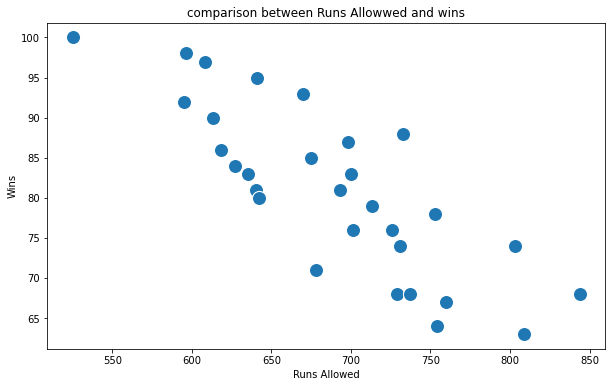

In [28]:
#checking relation b/w two variable

plt.figure(figsize=(10,6))
plt.title('comparison between Runs Allowwed and wins')
sns.scatterplot(df['runs_allowed'],df['No_of_predicted_wins'],s=200)
plt.xlabel("Runs Allowed")
plt.ylabel("Wins")

Here, we can observe that there is a negative linear relationship between Runs Allowed and Wins. As the data falls from left to right, it means that the target column is highly corelated with 'RA' column

In [29]:
df.columns

Index(['No_of_predicted_wins', 'runs', 'at_bats', 'Hits', 'Doubles', 'Triples',
       'Homeruns', 'Walk', 'strikeout', 'stolen_base', 'runs_allowed',
       'earned_runs', 'earned_run_avg', 'Complete Games', 'shutouts', 'saves',
       'error'],
      dtype='object')

Text(0, 0.5, 'Wins')

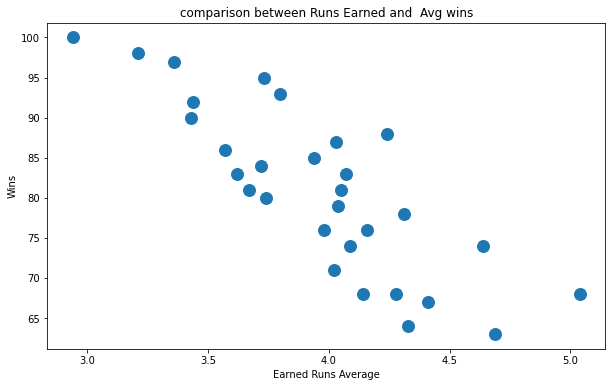

In [30]:
#checking relation b/w two variable

plt.figure(figsize=(10,6))
plt.title('comparison between Runs Earned and  Avg wins')
sns.scatterplot(df['earned_run_avg'],df['No_of_predicted_wins'],s=200)
plt.xlabel("Earned Runs Average")
plt.ylabel("Wins")

Even ERA i.e Earned Runs Average feature has negative linear relation with the label, stating this feature to be highly corelated with the label.

Text(0, 0.5, 'Earned Runs Avg')

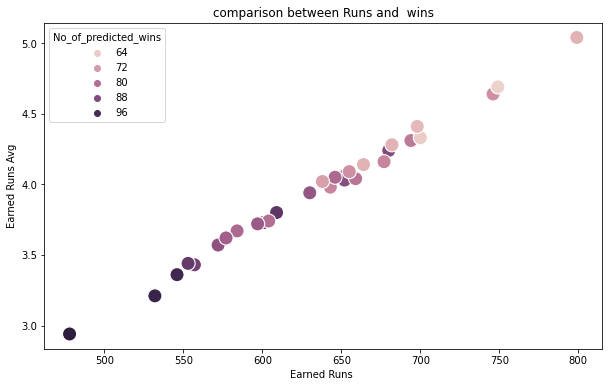

In [31]:
#checking relation b/w two variable

plt.figure(figsize=(10,6))
plt.title('comparison between Runs and  wins')
sns.scatterplot(df['earned_runs'],df['earned_run_avg'],hue=df['No_of_predicted_wins'],s=200)
plt.xlabel("Earned Runs ")
plt.ylabel("Earned Runs Avg")

As we can see there is a strong linear relationship between the features. As ER increases, ERA also increases.

Text(0, 0.5, 'Wins')

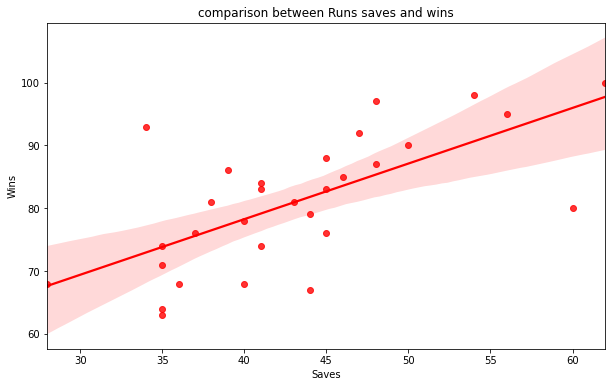

In [32]:
#checking relation b/w two variable

plt.figure(figsize=(10,6))
plt.title('comparison between Runs saves and wins')
sns.regplot(df['saves'],df['No_of_predicted_wins'],color='red')
plt.xlabel("Saves")
plt.ylabel("Wins")

Here, we can state that there is a positive linear relationship between the feature Saves and label Wins

Text(0, 0.5, 'Wins')

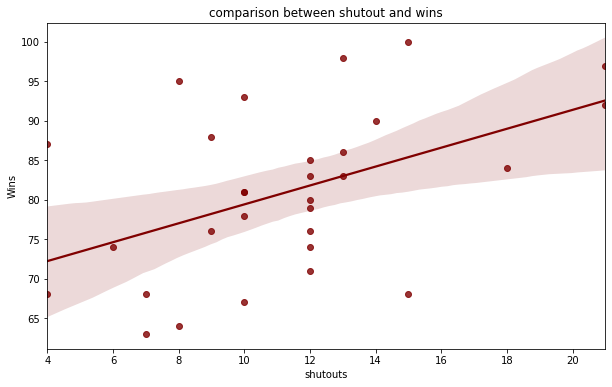

In [33]:
#checking relation b/w two variable

plt.figure(figsize=(10,6))
plt.title('comparison between shutout and wins')
sns.regplot(df['shutouts'],df['No_of_predicted_wins'],color='maroon')
plt.xlabel("shutouts")
plt.ylabel("Wins")

There is no much linearity between the feature and the label. In some of the datapoints, we can see whenever shoutouts is high, there is a chance of win

Text(0, 0.5, 'Wins')

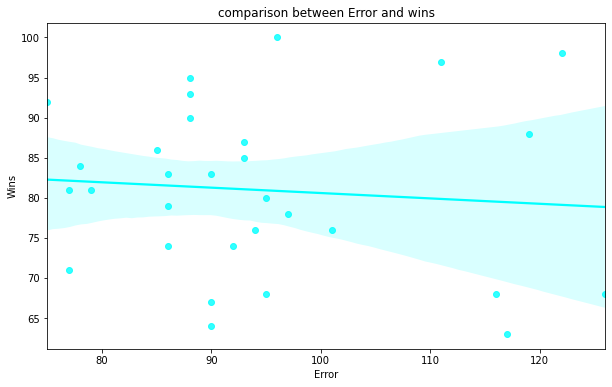

In [34]:
#checking relation b/w two variable

plt.figure(figsize=(10,6))
plt.title('comparison between Error and wins')
sns.regplot(df['error'],df['No_of_predicted_wins'],color='cyan')
plt.xlabel("Error")
plt.ylabel("Wins")

The data is scattered and there is no linear relationship exist between these columns

Text(0, 0.5, 'Wins')

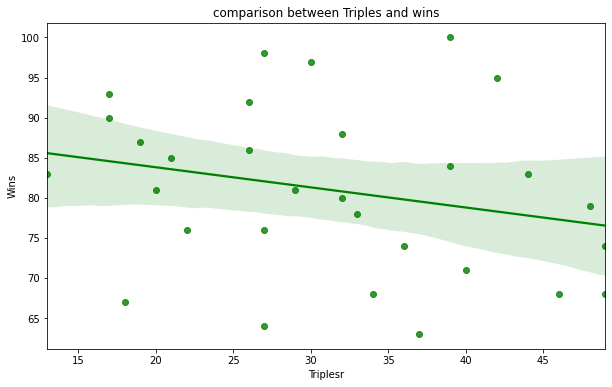

In [41]:
#checking relation b/w two variable

plt.figure(figsize=(10,6))
plt.title('comparison between Triples and wins')
sns.regplot(df['Triples'],df['No_of_predicted_wins'],color='green')
plt.xlabel("Triplesr")
plt.ylabel("Wins")

The feature (Triples) has a negative linear relationship with the target column

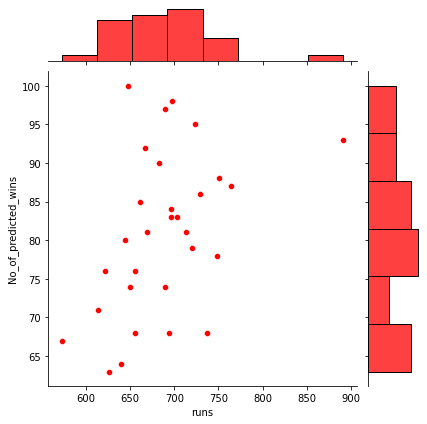

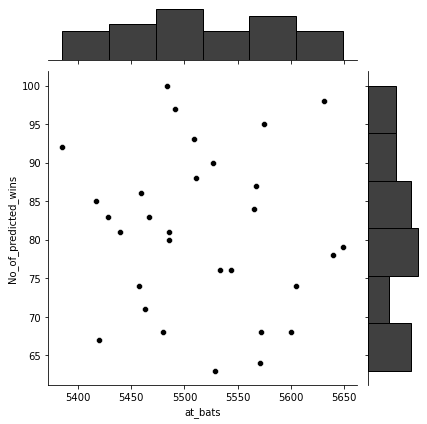

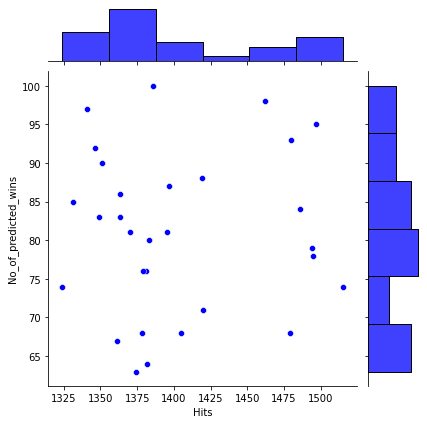

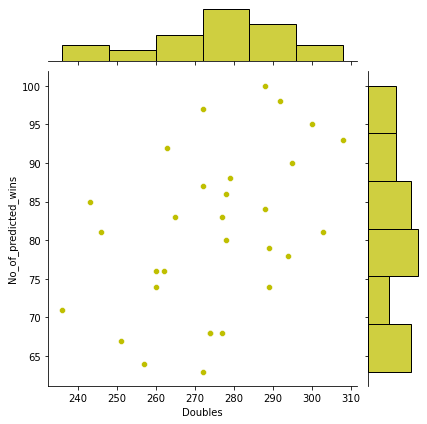

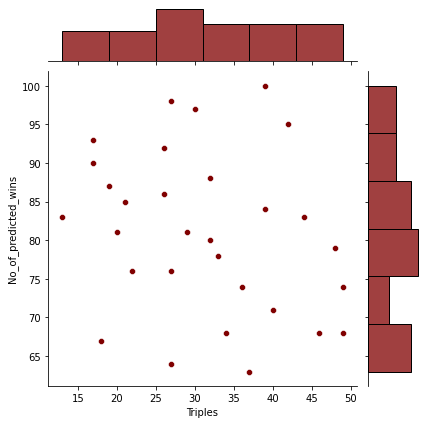

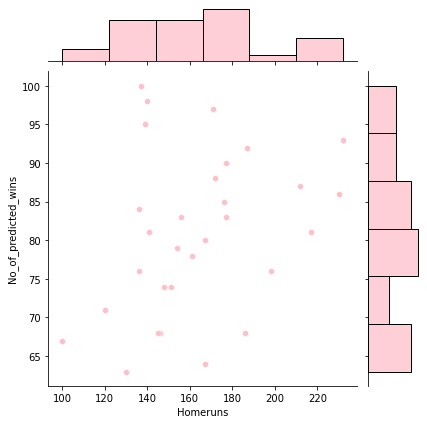

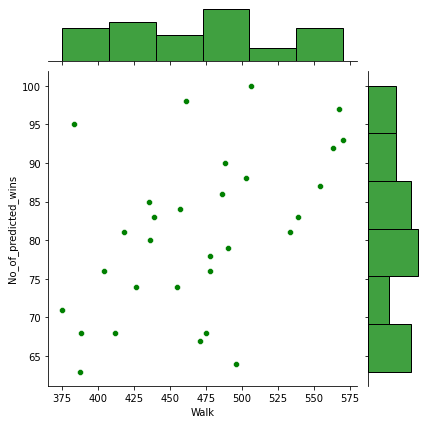

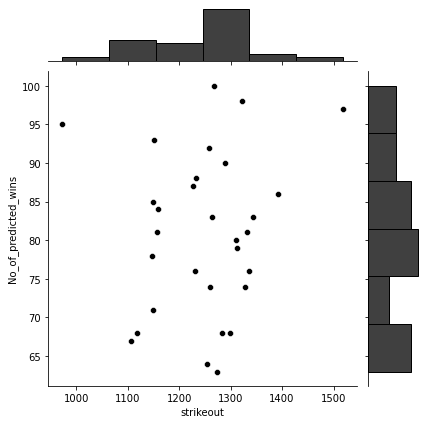

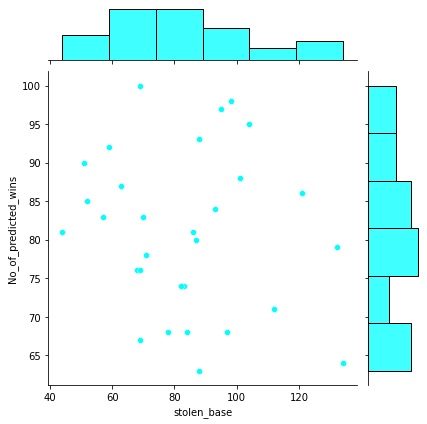

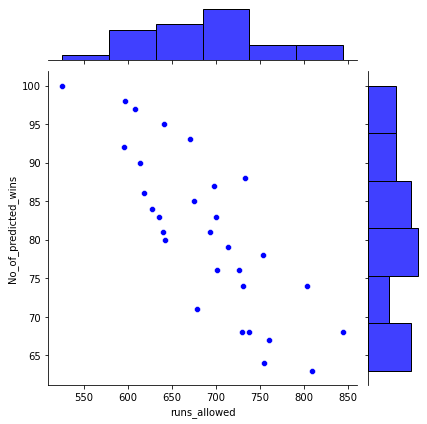

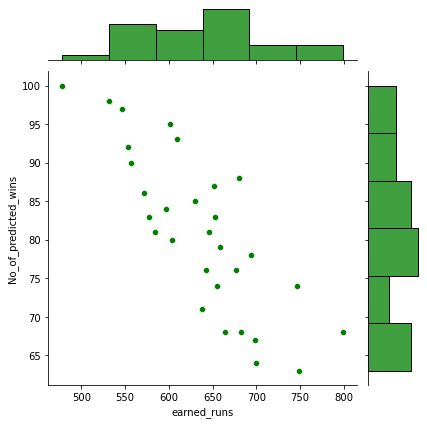

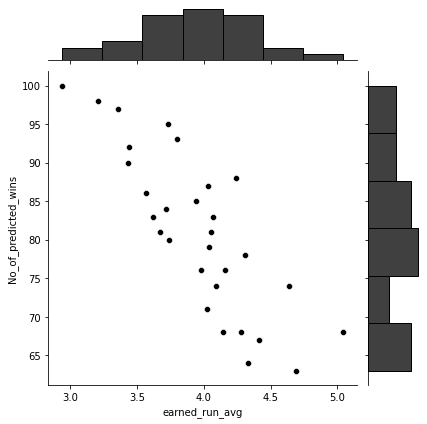

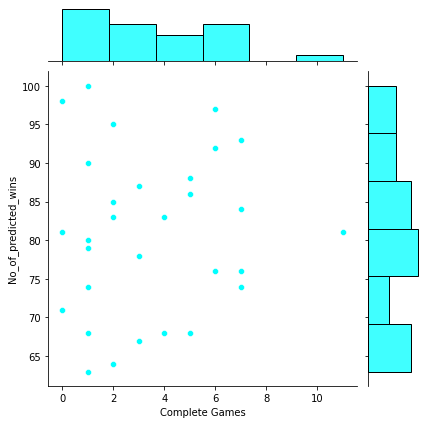

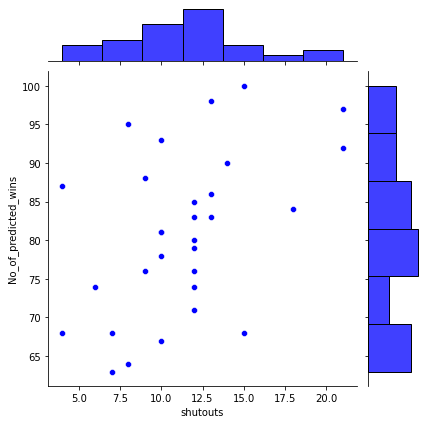

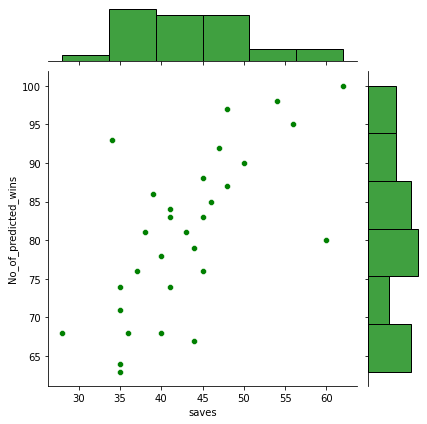

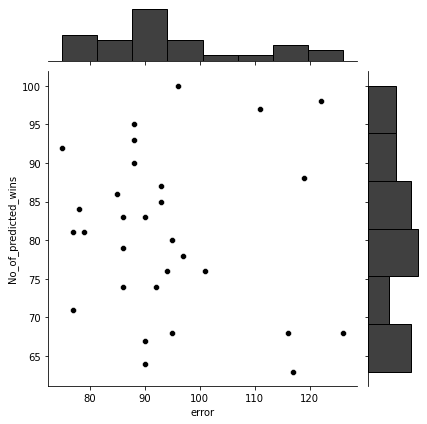

In [40]:
#checking the jointplot 

sns.jointplot(x='runs',y='No_of_predicted_wins',data=df,color='red')
sns.jointplot(x='at_bats',y='No_of_predicted_wins',data=df,color='black')
sns.jointplot(x='Hits',y='No_of_predicted_wins',data=df,color='b')
sns.jointplot(x='Doubles',y='No_of_predicted_wins',data=df,color='y')
sns.jointplot(x='Triples',y='No_of_predicted_wins',data=df,color='maroon')
sns.jointplot(x='Homeruns',y='No_of_predicted_wins',data=df,color='pink')
sns.jointplot(x='Walk',y='No_of_predicted_wins',data=df,color='green')
sns.jointplot(x='strikeout',y='No_of_predicted_wins',data=df,color='black')
sns.jointplot(x='stolen_base',y='No_of_predicted_wins',data=df,color='cyan')
sns.jointplot(x='runs_allowed',y='No_of_predicted_wins',data=df,color='b')
sns.jointplot(x='earned_runs',y='No_of_predicted_wins',data=df,color='green')
sns.jointplot(x='earned_run_avg',y='No_of_predicted_wins',data=df,color='black')
sns.jointplot(x='Complete Games',y='No_of_predicted_wins',data=df,color='cyan')
sns.jointplot(x='shutouts',y='No_of_predicted_wins',data=df,color='b')
sns.jointplot(x='saves',y='No_of_predicted_wins',data=df,color='green')
sns.jointplot(x='error',y='No_of_predicted_wins',data=df,color='black')

Observations:

Plot-1-shows that as runs are getting higher,the chances of winning becomes higher

Plot-2-shows that there is no significant relationship displayed between the label No_of_predicted_wins and the feature at_bats and the data points are all over the place.

Plot-3- Even here we can't say if there is any linear relation with our target variable and the data points are scattered too.

plot-4-We see that if number of doubles are under 250 the chances of win is below 85 and if the number of doubles more than 280 then the chance of win is more than 85.

Plot-5-For some reason the data points are scattered showing no relation with the label much and therefore we can say number of triples feature is not much correlated with label.

Plot-6-By looking at this plot we can say if the number of homeruns is below 140, the chances of wins becoms less

Plot-7-In case the walk is above 525 then number of wins are more than 80,but still there is not much relation observed between this feature and the label variables.

Plot-8-In this feature plot,it is not showing any linear relation with our label variable.

Plot-9-A stolen base happens when a base runner proceeds by capturing a base to which they are not entitled to and here if stolen base is between 40 to 60 the number of wins are above 80.

Plot-10-By observing the above plot we can say that Runs Average are negatively related to number of wins, that is because as the Runs Average number increases the win possibility decrease.

Plot-11-Just like the Runs Average number, Earned Runs also negatively impacts to number of wins

Plot-12-Earned Runs Average is negatively related to number of wins and is completely depends on feature Earned Runs.

Plot-13-We can see that as number of complete games goes above 6 then the number of wins is more than 75 and there is an outlying data present too

Plot-14-A shutout refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run so here as the shout outs rise the wins number increases too.

Plot-15-A save is rewarded to the relief pitcher who finishes a game for the winning team under certain circumstances so here as the number of save goes higher the number of wins also increases.

Plot-16-So here the number of errors are more in the range of 70 to 100 impacting the No. of predicted wins.


# Multivariate Analysis

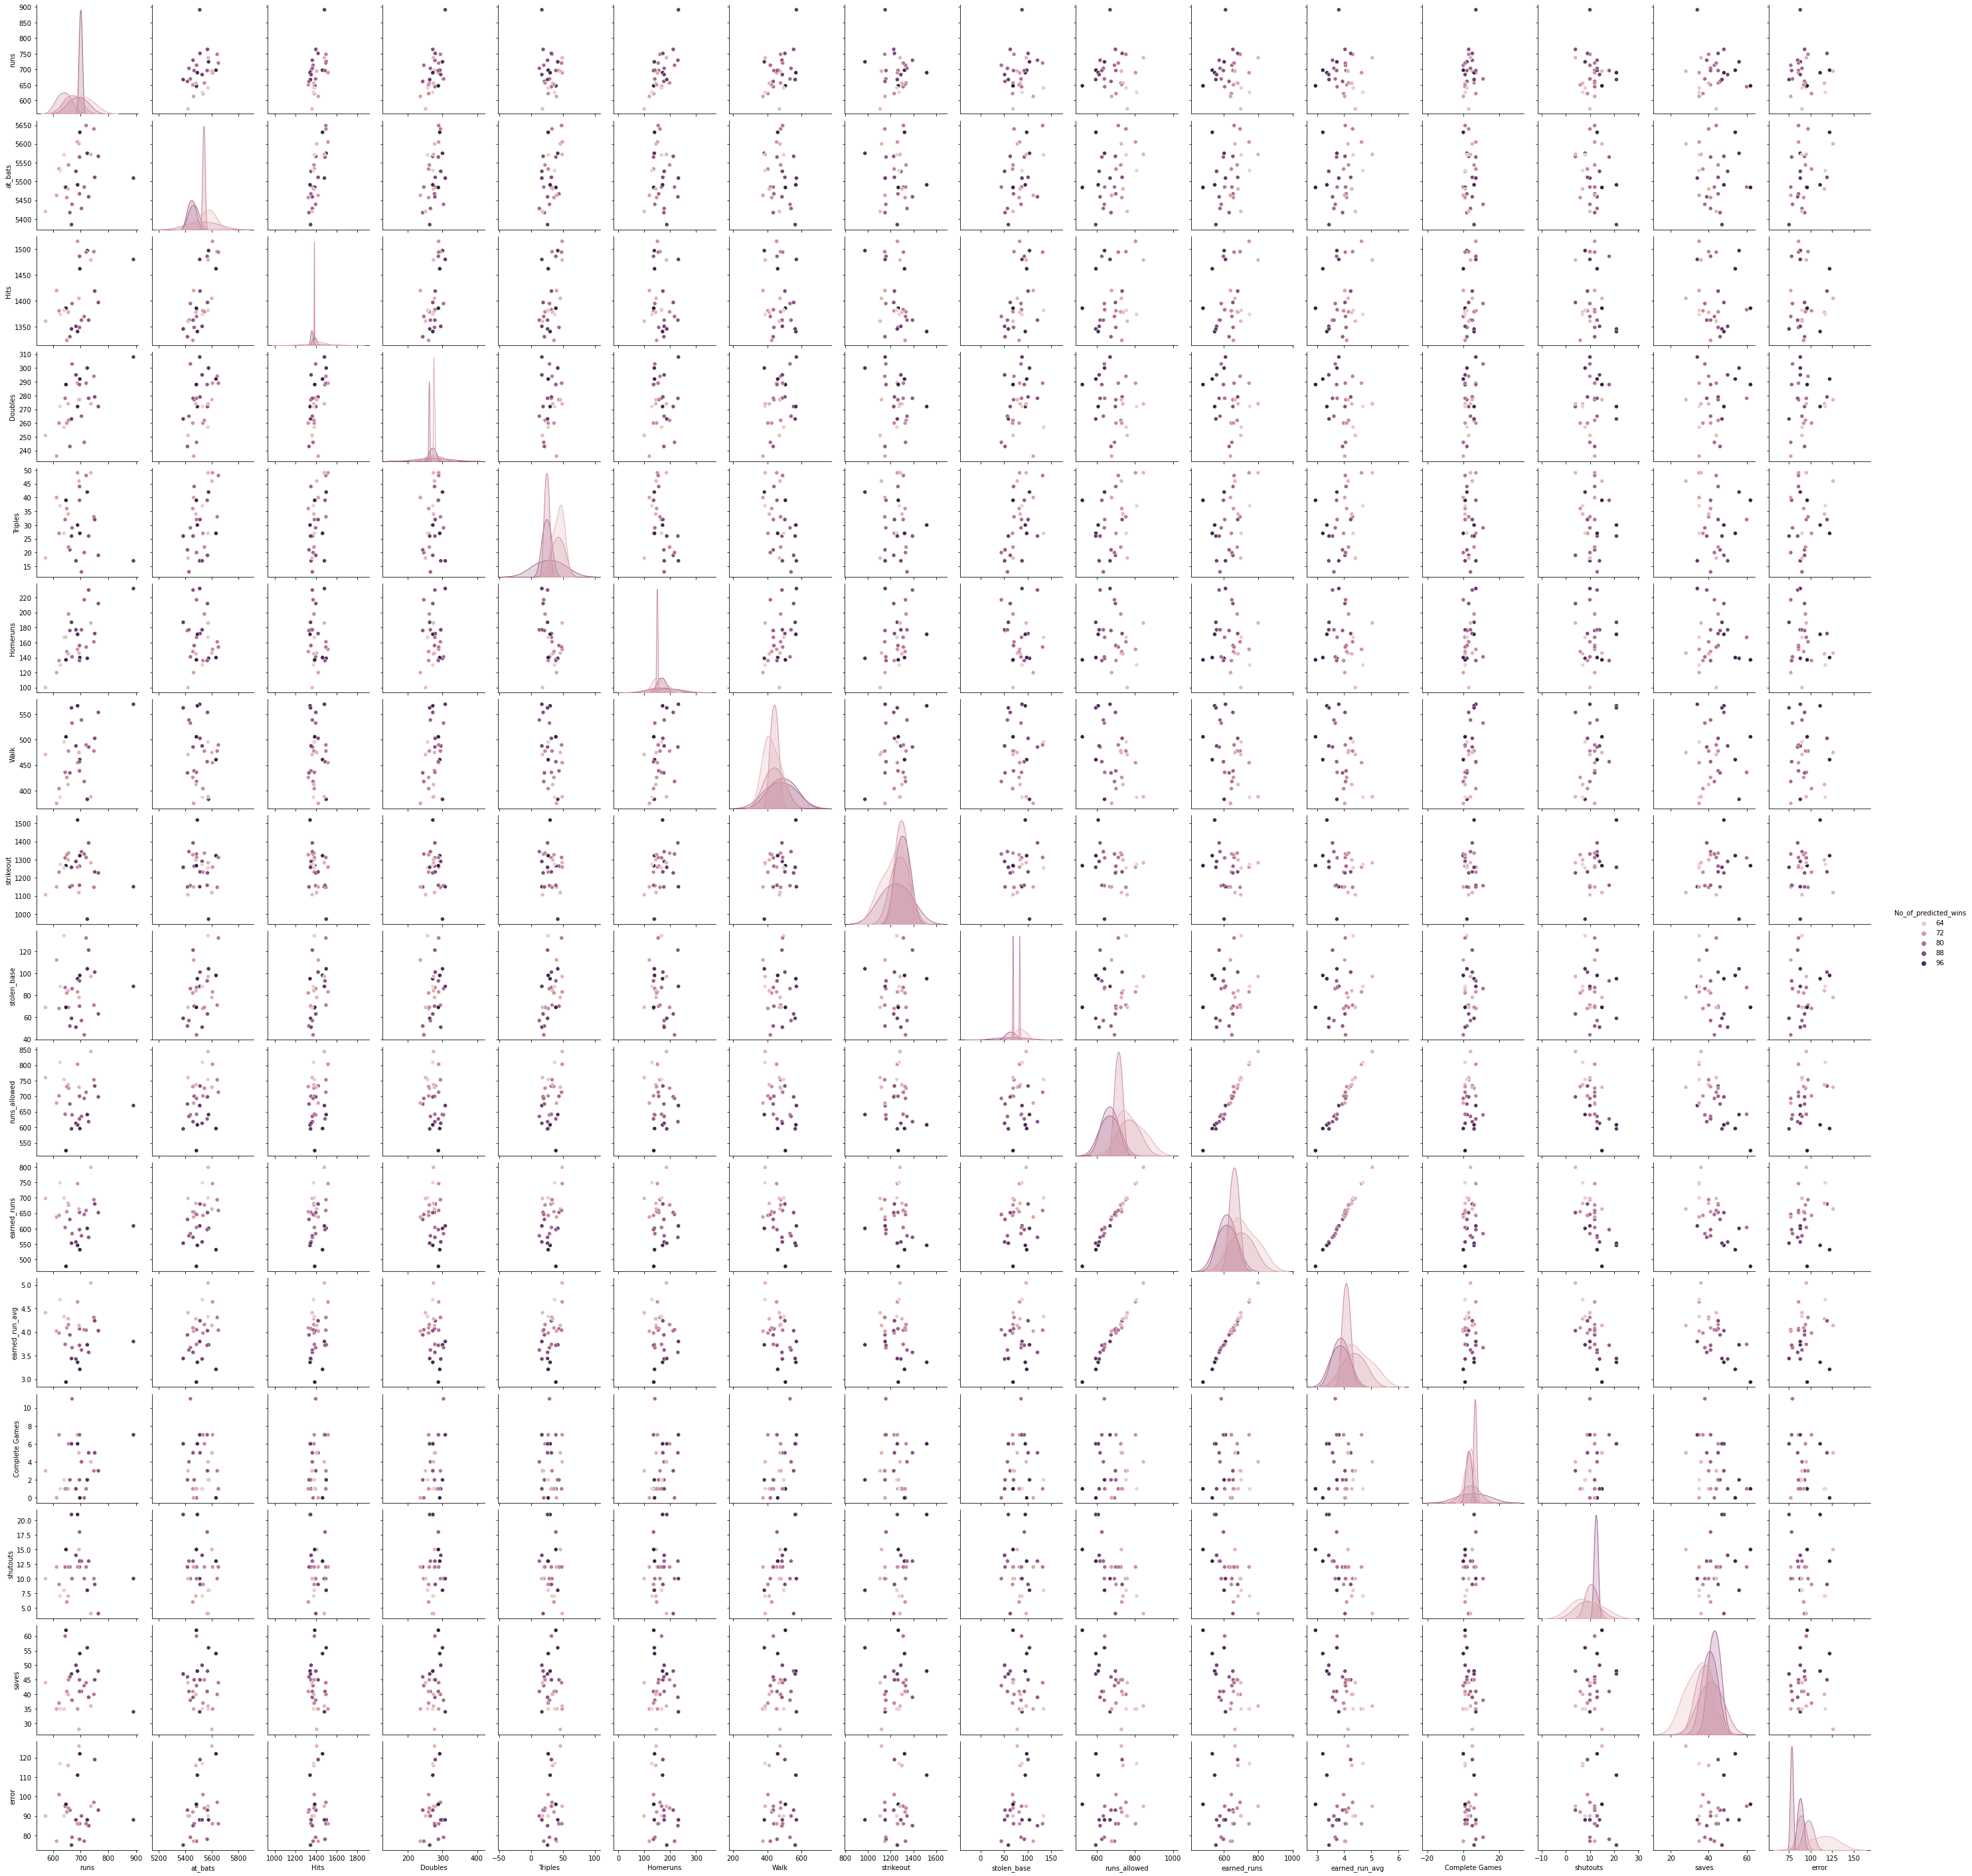

In [42]:
sns.pairplot(df,hue='No_of_predicted_wins')

This pairplot gives the pairwise relation between the columns which is plotted on the basis of the target variable. WE can also observe relatiponship between all the featues and the labels.

# Correlation

In [43]:
#CHECKING CORRELATION

df.corr()

,No_of_predicted_wins,runs,at_bats,Hits,Doubles,Triples,Homeruns,Walk,strikeout,stolen_base,runs_allowed,earned_runs,earned_run_avg,Complete Games,shutouts,saves,error
No_of_predicted_wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
at_bats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Homeruns,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Walk,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
strikeout,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
stolen_base,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


# Visualization using heatmap

<AxesSubplot:>

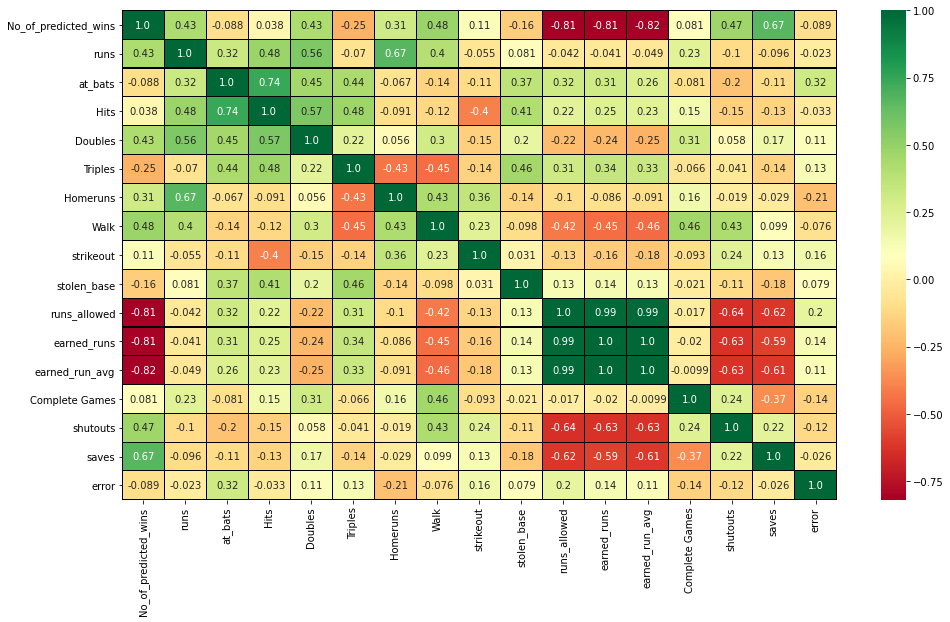

In [44]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),linecolor='black',linewidths=0.2,annot=True,fmt='0.2',cmap='RdYlGn')

This heatmap contains both negative as well as positive correlation


# Positively Correlated Colums

Saves

Shoutouts

BWalks

Doubles

Runs

Homeruns

Complete Games

Strikeouts

# Negatively Correlated Columns :


At Bats

Triples

Stolen bases

Runs allowed

Earned Runs

Earned Run Average

Hits

Error

# Visualizing Correlation between label and features using Heatmap

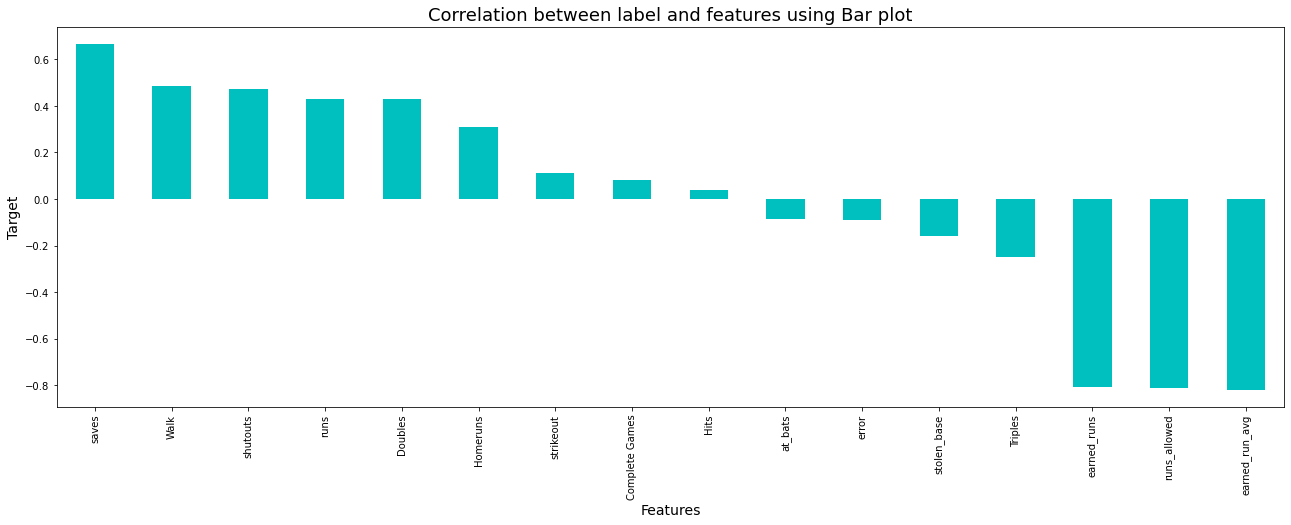

In [45]:
plt.figure(figsize=(22,7))
df.corr()['No_of_predicted_wins'].sort_values(ascending=False).drop(['No_of_predicted_wins']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation between label and features using Bar plot',fontsize=18)
plt.show()

From the Visualization, we can see that the features 'H' and 'CG' has very less correlation with the target variable.So, we can drop these columns

In [46]:
df.drop('Complete Games',axis=1, inplace=True)
df.drop('Hits',axis = 1, inplace=True)

In [47]:
df.head()

,No_of_predicted_wins,runs,at_bats,Doubles,Triples,Homeruns,Walk,strikeout,stolen_base,runs_allowed,earned_runs,earned_run_avg,shutouts,saves,error
0,95,724,5575,300,42,139,383,973,104,641,601,3.73,8,56,88
1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,12,45,86
2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,10,38,79
3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,9,37,101
4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,12,35,86


In [48]:
df.shape

(30, 15)

# Checking Outliers

No_of_predicted_wins       AxesSubplot(0.125,0.657941;0.133621x0.222059)
runs                    AxesSubplot(0.285345,0.657941;0.133621x0.222059)
at_bats                  AxesSubplot(0.44569,0.657941;0.133621x0.222059)
Doubles                 AxesSubplot(0.606034,0.657941;0.133621x0.222059)
Triples                 AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Homeruns                   AxesSubplot(0.125,0.391471;0.133621x0.222059)
Walk                    AxesSubplot(0.285345,0.391471;0.133621x0.222059)
strikeout                AxesSubplot(0.44569,0.391471;0.133621x0.222059)
stolen_base             AxesSubplot(0.606034,0.391471;0.133621x0.222059)
runs_allowed            AxesSubplot(0.766379,0.391471;0.133621x0.222059)
earned_runs                   AxesSubplot(0.125,0.125;0.133621x0.222059)
earned_run_avg             AxesSubplot(0.285345,0.125;0.133621x0.222059)
shutouts                    AxesSubplot(0.44569,0.125;0.133621x0.222059)
saves                      AxesSubplot(0.606034,0.1

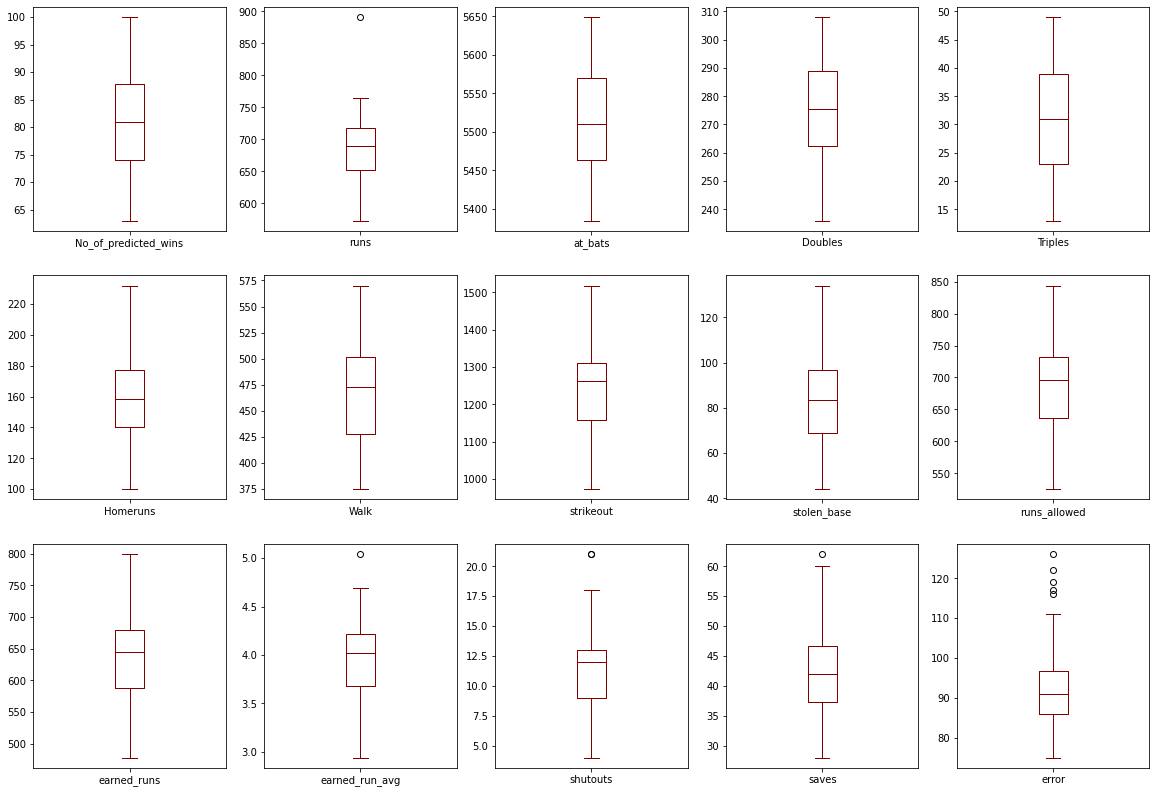

In [57]:
#some outliers are present

df.plot(kind='box',subplots=True,layout=(3,5),figsize=(20,14),color='maroon')

some outliers are presents in 5 columns so we have to remove these outliers.

# Removing outliers

z-score

In [62]:
features=df[['runs','earned_run_avg','shutouts','saves','error']]

In [63]:
from scipy.stats import zscore
z=np.abs(zscore(features))
z

array([[0.61907797, 0.50695519, 0.81462859, 1.67160651, 0.46146963],
       [0.13443166, 0.25459752, 0.1728    , 0.24987932, 0.60719689],
       [0.33290586, 0.64134684, 0.32091429, 0.65485616, 1.11724227],
       [1.14641931, 0.05301004, 0.56777144, 0.78410408, 0.48575751],
       [0.01327008, 1.53131824, 0.1728    , 1.04259994, 0.60719689],
       [3.50964704, 0.35016492, 0.32091429, 1.17184786, 0.46146963],
       [1.31142984, 0.16500309, 1.80205719, 0.6376231 , 0.0971515 ],
       [0.4286812 , 0.20980031, 0.32091429, 0.00861653, 1.26296953],
       [0.76562578, 0.48455658, 0.1728    , 2.18859821, 0.04857575],
       [1.03448909, 0.79216414, 0.32091429, 0.39636031, 0.194303  ],
       [1.08641548, 0.63537388, 0.56777144, 0.24987932, 1.79730279],
       [0.70562195, 0.86533293, 0.41965715, 0.52560823, 0.68006051],
       [0.47137623, 0.03658439, 0.1728    , 0.37912725, 0.0971515 ],
       [0.55792022, 0.45618501, 0.1728    , 0.24987932, 0.02428788],
       [0.09981406, 0.41138779, 0.

In [64]:
#creating new dataframe

new_df=df[(z<3).all(axis=1)]
new_df

,No_of_predicted_wins,runs,at_bats,Doubles,Triples,Homeruns,Walk,strikeout,stolen_base,runs_allowed,earned_runs,earned_run_avg,shutouts,saves,error
0,95,724,5575,300,42,139,383,973,104,641,601,3.73,8,56,88
1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,12,45,86
2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,10,38,79
3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,9,37,101
4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,12,35,86
6,87,764,5567,272,19,212,554,1227,63,698,652,4.03,4,48,93
7,81,713,5485,246,20,217,418,1331,44,693,646,4.05,10,43,77
8,80,644,5485,278,32,167,436,1310,87,642,604,3.74,12,60,95
9,78,748,5640,294,33,161,478,1148,71,753,694,4.31,10,40,97
10,88,751,5511,279,32,172,503,1233,101,733,680,4.24,9,45,119


This is new dataframe after removing the outliers

In [65]:
print(df.shape)
print(new_df.shape)

(30, 15)
(29, 15)


# Data loss percent

In [66]:
#checking the data loss perecent

data_loss=(30-29)/30*100
data_loss

3.3333333333333335

Data loss is not more after using zscore

# Checking for Skewness

In [67]:
#checking the skewness 

new_df.skew()

No_of_predicted_wins    0.119013
runs                   -0.215364
at_bats                 0.169573
Doubles                -0.335304
Triples                 0.090124
Homeruns                0.450862
Walk                    0.151193
strikeout              -0.233815
stolen_base             0.494966
runs_allowed            0.018155
earned_runs             0.018461
earned_run_avg          0.016693
shutouts                0.526943
saves                   0.627480
error                   0.840271
dtype: float64

 skewness is present in error,saves,shoutouts

# Removing the skewness 

In [68]:
skewed_features=['shutouts','saves','error']

In [69]:
from sklearn.preprocessing import PowerTransformer

scale=PowerTransformer(method='yeo-johnson')

In [70]:
new_df[skewed_features]=scale.fit_transform(new_df[skewed_features].values)
new_df[skewed_features].head()

,shutouts,saves,error
0,-0.787002,1.532753,-0.348265
1,0.236737,0.312020,-0.540820
2,-0.252844,-0.664137,-1.326125
3,-0.513555,-0.820689,0.650818
4,0.236737,-1.149165,-0.540820


In [71]:
#checking the skewness after applying the yeo-johnson method

new_df.skew()

No_of_predicted_wins    0.119013
runs                   -0.215364
at_bats                 0.169573
Doubles                -0.335304
Triples                 0.090124
Homeruns                0.450862
Walk                    0.151193
strikeout              -0.233815
stolen_base             0.494966
runs_allowed            0.018155
earned_runs             0.018461
earned_run_avg          0.016693
shutouts                0.000529
saves                  -0.000925
error                   0.065585
dtype: float64

we can see that, the skewness has been removed.

<AxesSubplot:xlabel='error', ylabel='Density'>

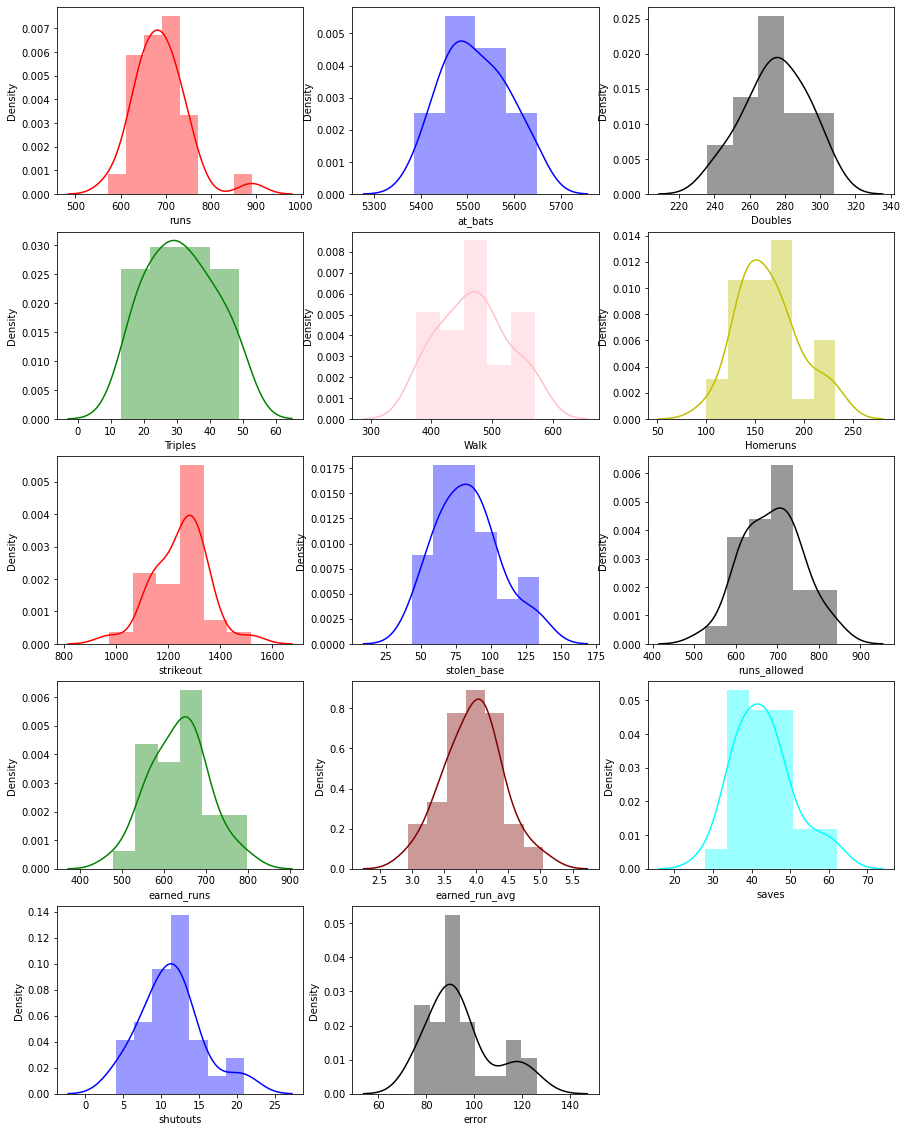

In [75]:
plt.figure(figsize=(15,20))
plt.subplot(5,3,1)
sns.distplot(df.runs,kde=True,color='red')
plt.subplot(5,3,2)
sns.distplot(df.at_bats,kde=True,color='b')
plt.subplot(5,3,3)
sns.distplot(df.Doubles,kde=True,color='black')
plt.subplot(5,3,4)
sns.distplot(df.Triples,kde=True,color='green')
plt.subplot(5,3,5)
sns.distplot(df.Walk,kde=True,color='pink')
plt.subplot(5,3,6)
sns.distplot(df.Homeruns,kde=True,color='y')
plt.subplot(5,3,7)
sns.distplot(df.strikeout,kde=True,color='red')
plt.subplot(5,3,8)
sns.distplot(df.stolen_base,kde=True,color='b')
plt.subplot(5,3,9)
sns.distplot(df.runs_allowed,kde=True,color='black')
plt.subplot(5,3,10)
sns.distplot(df.earned_runs,kde=True,color='green')
plt.subplot(5,3,11)
sns.distplot(df.earned_run_avg,kde=True,color='maroon')
plt.subplot(5,3,12)
sns.distplot(df.saves,kde=True,color='cyan')
plt.subplot(5,3,13)
sns.distplot(df.shutouts,kde=True,color='b')
plt.subplot(5,3,14)
sns.distplot(df.error,kde=True,color='black')


now the data is normally distributed and the skewness ia also removed

# Data Preprocessing

Sparating dependent and independent variables

In [77]:
x=new_df.drop('No_of_predicted_wins',axis=1)
y=new_df['No_of_predicted_wins']

In [78]:
#checking the shape

x.shape

(29, 14)

In [79]:
y.shape

(29,)

# Feature Scaling

In [81]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,runs,at_bats,Doubles,Triples,Homeruns,Walk,strikeout,stolen_base,runs_allowed,earned_runs,earned_run_avg,shutouts,saves,error
0,0.959398,0.830084,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,0.236737,-1.149165,-0.540820
5,1.856900,0.716535,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,-2.064039,0.677176,0.082858
6,0.712585,-0.447345,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-0.252844,0.052325,-1.588197
7,-0.835605,-0.447345,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,0.236737,1.908137,0.237592
8,1.497899,1.752672,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,-0.252844,-0.365006,0.383386
9,1.565212,-0.078310,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,-0.513555,0.312020,1.554265


Now our data is scaled

# Check for Multicolinearity:

In [84]:
#VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF Features']=[variance_inflation_factor(x.values,i)for i in range (len(x.columns))]
vif['Features']=x.columns
vif

,VIF Features,Features
0,6.219825,runs
1,9.828077,at_bats
2,2.683572,Doubles
3,3.196853,Triples
4,7.369072,Homeruns
5,2.686472,Walk
6,2.741072,strikeout
7,1.757901,stolen_base
8,179.096825,runs_allowed
9,1754.643859,earned_runs


The VIF value is more then 10 in some columns so we can drop the highest VIF value that is earned_run 

In [85]:
x.drop('earned_runs',axis=1,inplace=True)

In [86]:
# Again checking the VIF after removing one column

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF Features']=[variance_inflation_factor(x.values,i)for i in range (len(x.columns))]
vif['Features']=x.columns
vif

,VIF Features,Features
0,4.352902,runs
1,3.177214,at_bats
2,2.597985,Doubles
3,3.072775,Triples
4,4.949255,Homeruns
5,2.561982,Walk
6,2.661842,strikeout
7,1.680467,stolen_base
8,119.939744,runs_allowed
9,111.859162,earned_run_avg


we can observe that multicolinearity still exists, so we can drop column 'run allowed' as it has high vif value.

In [87]:
#dropping the column

x.drop('runs_allowed',axis=1,inplace=True)

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF Features']=[variance_inflation_factor(x.values,i)for i in range (len(x.columns))]
vif['Features']=x.columns
vif

,VIF Features,Features
0,4.250076,runs
1,2.238746,at_bats
2,2.597917,Doubles
3,3.030073,Triples
4,4.562014,Homeruns
5,2.222720,Walk
6,2.042786,strikeout
7,1.568151,stolen_base
8,3.878177,earned_run_avg
9,2.651314,shutouts


Now, we can observe that VIF values of all columns are less than 10. Multicolinearity problem is solved

# Spliting the data 

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=50)

# MOdeling 

finding the Best Model

# Linear Regression

In [114]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
#r2 score
print('r2 score:',r2_score(y_test,predlr))

#mean Absolute Error,Mean Squared error,

print('MAE',mean_absolute_error(y_test,predlr))
print('MSE',mean_squared_error(y_test,predlr))
print('RMSE',np.sqrt(mean_squared_error(y_test,predlr)))


r2 score: 0.9291790579976077
MAE 2.4627865987898425
MSE 10.163242343651953
RMSE 3.1879840563672763


# Random Forest Regressor

In [170]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
#r2 score
print('r2 score:',r2_score(y_test,pred))

#mean Absolute Error,Mean Squared error,

print('MAE',mean_absolute_error(y_test,pred))
print('MSE',mean_squared_error(y_test,pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 0.6456596094287681
MAE 6.134444444444444
MSE 50.85003333333332
RMSE 7.130920931642232


# Ridge Regressor

In [115]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
paramsRidge={'alpha':[0.01,0.1,1.0,10.26],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
ridge=Ridge()
gcv=GridSearchCV(ridge,paramsRidge)
gcv.fit(x_train,y_train)
print(gcv.best_params_)

{'alpha': 10.26, 'solver': 'saga'}


In [117]:
#checking the r2 score for ridge

ridge=Ridge(alpha=10.26,solver='sag')
ridge.fit(x_train,y_train)
ridge.score=(x_train,y_train)
pred=ridge.predict(x_test)
#r2 score
print('R2score',r2_score(y_test,pred))

# Mean Absolute Error (MAE)
print('MAE',mean_absolute_error(y_test,pred))


#Mean Squared Error (MSE)
print('MSE',mean_squared_error(y_test,pred))

# Root Mean Squared Error
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

R2score 0.8228458787542976
MAE 4.385997153146939
MSE 25.422709942716608
RMSE 5.042093805426135


The r2_score of Ridge Regressor is 82%

# Lasso Regressor

In [119]:
from sklearn.linear_model import Lasso

parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
lasso=Lasso()
lasso.fit(x_train,y_train)
gcv=GridSearchCV(lasso,parameters)
gcv.fit(x_train,y_train)
print(gcv.best_params_)

{'alpha': 1, 'random_state': 0}


In [122]:
#checking r2 score for Lasso

lasso=Lasso(alpha=1,random_state=0)
lasso.fit(x_train,y_train)
lasso.score(x_train,y_train)
pred=lasso.predict(x_test)

#r2 score
print('R2 score:',r2_score(y_test,pred))

# Mean Absolute Error (MAE)
print('MAE',mean_absolute_error(y_test,pred))

#Mean Squared Error (MSE)
print('MSE',mean_squared_error(y_test,pred))

# Root Mean Squared Error
print('RMSE',np.sqrt(mean_absolute_error(y_test,pred)))


R2 score: 0.8642951302468397
MAE 3.8253497504300973
MSE 19.4744864939597
RMSE 1.9558501349618016


The R2_score using Lasso Regressor is 86%.

# Stochastic Gradient Descent Regressor

In [126]:
#checking r2 score for Stochastic Gradient Descent Regressor
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd.fit(x_train,y_train)
pred=sgd.predict(x_test)
#r2 score

print('R2score',r2_score(y_test,pred))

# Mean Absolute Error (MAE)
print('MAE',mean_absolute_error(y_test,pred))

#Mean Squared Error (MSE)
print('MSE',mean_squared_error(y_test,pred))

# Root Mean Squared Error
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))


R2score 0.9295435499323789
MAE 2.7435509302555974
MSE 10.110935501062073
RMSE 3.1797697245338497


The R2_score using SGDRegressor is 92%.

# Checking for Cross Validation Score

In [127]:
from sklearn.model_selection import cross_val_score

In [128]:
# Checking CV score for LinearRegression

print(cross_val_score(lr,x,y,cv=5).mean())

0.3734441230489941


In [130]:
# Checking CV score for Ridge Regression

print(cross_val_score(ridge,x,y,cv=5).mean())

0.3498032747106784


In [131]:
# Checking CV score for Lasso Regression

print(cross_val_score(lasso,x,y,cv=5).mean())

0.520653701943612


In [134]:
# Checking CV score for SGD Regression

print(cross_val_score(sgd,x,y,cv=5).mean())

0.26848044676551297


In [171]:
# Checking CV score for Randomforest Regression

print(cross_val_score(rf,x,y,cv=5).mean())

-0.6043706967679896


From the difference of both R2_score and cross validation score, we can conclude that Lasso best fits the model.

# Hyperparameter Tuning

In [136]:
# Lasso Regresssor
parameters = {'alpha':[0.01,0.1,1.0,10.26],
              'selection':['cyclic','random'],
              'max_iter':[2,4,6,8,10],
              'tol':[100,1000],
              'fit_intercept':['bool']}

In [137]:
gcv=GridSearchCV(Lasso(),parameters,cv=5)

In [138]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.26],
                         'fit_intercept': ['bool'],
                         'max_iter': [2, 4, 6, 8, 10],
                         'selection': ['cyclic', 'random'],
                         'tol': [100, 1000]})

In [139]:
gcv.best_params_

{'alpha': 1.0,
 'fit_intercept': 'bool',
 'max_iter': 6,
 'selection': 'random',
 'tol': 100}

In [166]:

# Creating Final Model
Baseball = Lasso(alpha=0.1,fit_intercept='bool',max_iter=10,selection='random',tol=1000)
Baseball.fit(x_train,y_train)
pred = Baseball.predict(x_test)
print('R2_score:',r2_score(y_test,pred)*100)
print("RMSE value:",np.sqrt(mean_squared_error(y_test,pred)))

R2_score: 91.70362189509294
RMSE value: 3.4504803582467876


After tuning the model, the R2_score is 91.70% for the best model

# Saving the model

In [172]:
#saving the Model

import joblib
joblib.dump(Baseball,'Baseball.pkl')

['Baseball.pkl']

# Loading the model

In [176]:
loadmodel=joblib.load('Baseball.pkl')

In [182]:
pred_data=pd.DataFrame()
pred_data['Real_values']=y_test
pred_data['Predicted_by_model']=predict
pred_data

,Real_values,Predicted_by_model
29,68,63.278128
9,78,78.088470
28,74,74.996337
10,88,83.052160
18,68,72.498919
19,64,65.838907
25,92,90.959716
20,90,93.504108
15,100,104.731997


This is the dataframe having Real data with the predicted data from the best model.

# Prediction Visualization

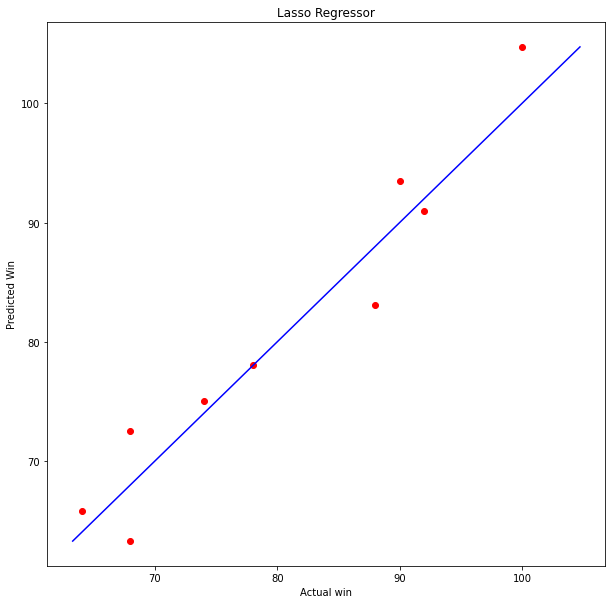

In [185]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,predict,c='r')
plt1=max(max(predict),max(y_test))
plt2=min(min(predict),min(y_test))
plt.plot([plt1,plt2],[plt1,plt2],'b-')
plt.xlabel('Actual win')
plt.ylabel('Predicted Win')
plt.title('Lasso Regressor')
plt.show()

The blue line represents the actual win and red dots are the predicted win.

# Conclusion

1.In this dataset all the columns was having numerical value and there was no object column.

2.We did EDA (plotting various kinds of figure) to understand the data and wrote an observation as well.

3.At the end, we trained a model with train test split that is giving 86% r2_score.

After doing  hyperparameter tuning our R2 score is increase to 91.70%..